In [23]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

['Vaccinated', 0.0, 2.0, 21.1, 20.0, 22.4]
['Vaccinated', 2.0, 4.0, 45.0, 43.7, 46.4]
['Vaccinated', 4.0, 6.0, 69.2, 68.6, 69.8]
['Vaccinated', 6.0, 8.0, 88.9, 88.3, 89.6]
['Booster', 0.0, 2.0, 8.2, 8.0, 8.5]
['Recovered', 4.0, 6.0, 10.5, 8.8, 12.4]
['Recovered', 6.0, 8.0, 14.0, 13.3, 14.8]
['Recovered', 8.0, 10.0, 20.6, 19.2, 22.1]
['Recovered', 10.0, 12.0, 28.5, 26.9, 30.2]
['Recovered then Vaccinated', 0.0, 2.0, 3.7, 3.1, 4.5]
['Recovered then Vaccinated', 2.0, 4.0, 4.3, 3.5, 5.2]
['Recovered then Vaccinated', 4.0, 6.0, 10.3, 9.4, 11.4]
['Recovered then Vaccinated', 6.0, 8.0, 11.6, 10.0, 13.5]
['Vaccinated then Recovered', 4.0, 6.0, 12.8, 9.9, 16.6]
['Vaccinated then Recovered', 6.0, 8.0, 17.2, 15.2, 19.2]


<Figure size 432x288 with 0 Axes>

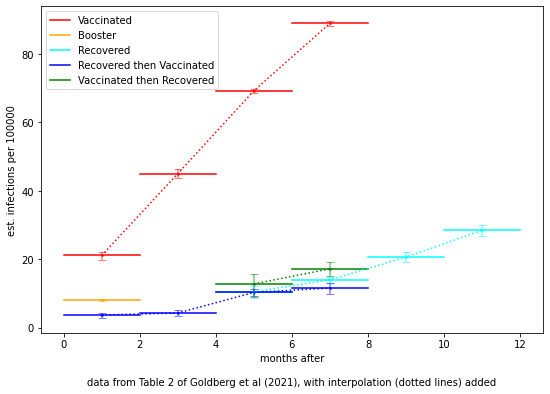

In [82]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize=(9,6))

colors = {
    'Vaccinated' : 'red',
    'Booster' : 'orange',
    'Recovered' : 'cyan',
    'Recovered then Vaccinated' : 'blue',
    'Vaccinated then Recovered' : 'green',
}

interps = {}
for name in colors.keys():
    interps[name] = {"x":[], "y":[]}

with open("data.txt") as f:
    for line in f:
        field = [x.strip() for x in line.split(",")][:-1]
        for i in range(1,len(field)):
            field[i] = float(field[i])
        print(field)
        x = np.linspace(0,12,13)
        y = np.empty((len(x)))
        y[:] = np.nan
        for i in range(int(field[1]), int(field[2])+1):
            y[i] = field[3]
        plt.plot(x,y, color=colors[field[0]], label=field[0])
        m = (field[1] + field[2]) / 2
        plt.errorbar(m, field[3], yerr=[[field[4]-field[3]], [field[3]-field[5]]], color=colors[field[0]], fmt='o', markersize=2, capsize=4, alpha=0.5)
        
        interps[field[0]]["x"].append(m)
        interps[field[0]]["y"].append(field[3])

        
for name,data in interps.items():
    plt.plot(data["x"], data["y"], color=colors[name], ls="dotted")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.xlabel("months after\n\ndata from Table 2 of Goldberg et al (2021), with interpolation (dotted lines) added")
plt.ylabel("est. infections per 100000")

plt.savefig("fig.png", dpi=300, bbox_inches="tight", pad_inches=0.1, facecolor='white', transparent=False)